Importamos las librerias necesarias

In [1]:
# Libreria para cinematica inversa
import ikpy
from ikpy import plot_utils,geometry_utils
from ikpy.chain import Chain
from ikpy.link import OriginLink, URDFLink
# Graficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
%matplotlib inline
from IPython.display import HTML
from PIL import Image
# Operaciones
import numpy as np
import math

Creamos el brazo, basandonos en el brazo izquierdo de Poppy-torso

In [2]:
left_arm_chain = Chain(name='left_arm', links=[
    URDFLink(
        name="shoulder_y",
        translation_vector=[0, 0, 0],
        orientation=[0, 0, 0],
        rotation=[1, 0, 0],
    ),
    URDFLink(
        name="shoulder_x",
        translation_vector=[-10, 0, 5],
        orientation=[0, 1.57, 0],
        rotation=[0, 1, 0],
    ),
    URDFLink(
      name="elbow",
      translation_vector=[25, 0, 0],
      orientation=[0, 0, 1.57],
      rotation=[0, 0, 1],
    ),
    URDFLink(
      name="wrist",
      translation_vector=[22, 0, 0],
      orientation=[0, 0, 0],
      rotation=[0, 1, 0],
    )
])

Creamos dos variables, una que obtiene el punto original del brazo y otra para establecer un punto objetivo

In [3]:
initial_pos = left_arm_chain.forward_kinematics([0] * 4) # Posicion inicial del brazo (4 enlaces, 4 posiciones)
initial_pos = list(np.around(initial_pos[:3, 3],decimals=2))
#target_pos = [-9.98,13.82,-26.33]
target_pos = [-16.23,-7.61,-15.68]
print((list(initial_pos),target_pos))

([-9.98, 22.0, -20.02], [-16.23, -7.61, -15.68])


Visualizamos el brazo y el punto objetivo que hemos puesto

(-50.0, 50.0)

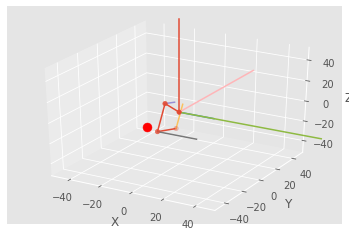

In [9]:
plt.style.use('ggplot')
ax = plt.figure().add_subplot(111, projection='3d') # Este objeto almacena la figura
initial_pos = left_arm_chain.inverse_kinematics(geometry_utils.to_transformation_matrix([-9.98,13.82,-26.33]))
left_arm_chain.plot(initial_pos, ax, target=target_pos)
# Propiedades de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([-50.0, 50.0])
ax.set_ylim3d([-50.0, 50.0])
ax.set_zlim3d([-50.0, 50.0])

Probamos el movimiento del brazo en cada uno de los grados de libertad

In [5]:
trayectory = []
# Creamos la trayectoria
# Solo tomamos 3 DOF, ya que el ultimo enlace no tiene movilidad
for i in range(3):
    for j in range(1,10):
        t = np.zeros(4)
        t[i]=math.radians(10*j)
        trayectory.append(t)

fig = Figure(figsize=(10,10))
width, height = fig.get_size_inches() * fig.get_dpi()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111, projection='3d') # Este objeto almacena la figura
left_arm_chain.plot(initial_pos, ax, target=target_pos)
# Propiedades de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([-50.0, 50.0])
ax.set_ylim3d([-50.0, 50.0])
ax.set_zlim3d([-50.0, 50.0])
canvas.draw()
img = Image.fromarray(np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3), 'RGB')
im = plt.imshow(img, interpolation='none', aspect='auto', vmin=0, vmax=1)

# Funcion de actualizacion de datos
def animate_func(i):
    fig.clear()
    ax = fig.add_subplot(111, projection='3d')
    #step = left_arm_chain.inverse_kinematics(geometry_utils.to_transformation_matrix(trayectory[i]))
    step = trayectory[i]
    left_arm_chain.plot(step, ax, target=target_pos)
    # Propiedades de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim3d([-50.0, 50.0])
    ax.set_ylim3d([-50.0, 50.0])
    ax.set_zlim3d([-50.0, 50.0])
    canvas.draw()
    img = Image.fromarray(np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3), 'RGB')
    im.set_array(img)
    return [im]

# Renderizado
anim = animation.FuncAnimation(fig,animate_func,frames = len(trayectory),interval = 10000 / len(trayectory))
plt.close()
HTML(anim.to_html5_video())